# Prédiction et Visualisation des Maladies Cardiaques
## Description du projet : 

Développer un tableau de bord interactif pour prédire les risques de maladies cardiaques en fonction des données de santé des patients. 

1. **Données Kaggle** : 
   - `Heart Disease UCI` : https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

2. **Technologies** : 
   - `Python` : Jupiter NoteBook
   - `Streamlit` : pour le tableau de bord interactif
   - `Scikit-Learn` : pour les modèles de machine learning
   - `Matplotlib/Seaborn` : pour les visualisations

3. **Fonctionnalités** : 
   - `Visualisation des données` : Distribution des caractéristiques des patients (âge, sexe, pression artérielle, etc.).
   - `Modèles de prédiction` : Utilisation de modèles de machine learning (par exemple, logistic regression, decision tree, random forest) pour prédire les risques de maladies cardiaques.
   - `Interface utilisateur` : Permettre aux utilisateurs de saisir leurs données de santé et d'obtenir une prédiction du risque.
   - `Analyse des caractéristiques` : Afficher les caractéristiques les plus influentes pour les prédictions.

4. **Avantages** : 
   - `Pertinence` : Correspond à notre apprentissage en machine learning, deep learning, et traitement de données.
   - `Impact` : Utilité pratique et impact potentiel sur la santé publique.
   - `Accessibilité` : Données disponibles gratuitement sur Kaggle, outils utilisés open source.


## 1. Exploration des données (blocs 1 à 13)
1. **Charger et explorer le dataset Heart Disease UCI**
2. **Analyser les caractéristiques et comprendre la distribution des données**

In [1]:
# Bloc 1 : Importer les bibliothèques et charger les données

# Importer les bibliothèques nécessaires
import joblib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import streamlit as st
import zipfile

from sklearn.preprocessing import LabelEncoder

# Configuration de l'API Kaggle
os.environ['KAGGLE_USERNAME'] = 'votre_nom_utilisateur_kaggle'
os.environ['KAGGLE_KEY'] = 'votre_clé_kaggle'

# Télécharger le dataset depuis Kaggle
!kaggle datasets download -d redwankarimsony/heart-disease-data

# Décompresser le fichier téléchargé
with zipfile.ZipFile('heart-disease-data.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Charger le dataset
df = pd.read_csv('heart_disease_uci.csv')

# Examiner les premières lignes du dataset
print(df.head())

# Vérifier les types de données des colonnes
print(df.dtypes)

# Convertir la colonne 'sex' en numérique
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

# Appliquer LabelEncoder à la colonne cp pour conserver les correspondances
le = LabelEncoder()
df['cp_encoded'] = le.fit_transform(df['cp'])  # Créer une nouvelle colonne avec les codes

# Afficher la correspondance entre les labels texte et les codes
print("Correspondance des catégories 'cp' :")
for index, label in enumerate(le.classes_):
    print(f"Code {index} : {label}")

# Examiner à nouveau les types de données des colonnes
print(df.dtypes)

# Filtrer les colonnes numériques pour la matrice de corrélation
numeric_df = df.select_dtypes(include=[np.number])


Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
heart-disease-data.zip: Skipping, found more recently modified local copy (use --force to force download)
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.

## Dictionnaire des Colonnes du Dataset

Description des colonnes présentes dans le dataset `heart_disease_uci.csv` :

1. **id** : Identifiant unique pour chaque patient. Cette colonne est utilisée pour l'identification et n'a pas de valeur dans les analyses statistiques.

2. **age** : Âge du patient en années. Cette caractéristique est importante car l'âge est un facteur de risque significatif pour les maladies cardiaques.

3. **sex** : Sexe du patient. C’est un facteur de risque pour les maladies cardiaques, avec des différences dans la prévalence et la gravité entre les sexes.

4. **dataset** : Lieu d'études.

5. **cp** : Type de douleur thoracique. Il s'agit d'une variable catégorielle avec plusieurs niveaux :
   - Douleur angineuse typique
   - Douleur angineuse atypique
   - Douleur non angineuse
   - Pas de douleur

6. **trestbps** : Pression artérielle au repos en mm Hg.

7. **chol** : Taux de cholestérol sérique en mg/dl. Un taux élevé de cholestérol est associé à un risque accru de maladies cardiaques.

8. **fbs** : Glycémie à jeun (fbs > 120 mg/dl) :
   - `True` : Glycémie élevée
   - `False` : Glycémie normale

9. **restecg** : Résultats de l'électrocardiogramme au repos :
   - Normal
   - Présence de signes d'une anomalie stt
   - Présence de signes d'une anomalie hypertrophie ventriculaire gauche

10. **thalch** : Fréquence cardiaque maximale atteinte pendant l'exercice.

11. **exang** : Indication d'angine induite par l'exercice :
    - `True` : Oui
    - `False` : Non

12. **oldpeak** : Dépression du segment ST induite par l'exercice par rapport au repos. Cela peut indiquer une maladie cardiaque si la dépression est significative.

13. **slope** : Pente du segment ST au pic de l'exercice :
    - Pente ascendante
    - Pente plate
    - Pente descendante

14. **ca** : Nombre de vaisseaux principaux (0-3) colorés par fluoroscopie. Plus le nombre est élevé, plus il y a de vaisseaux obstructifs.

15. **thal** : Thalassémie (anomalie génétique) :
    - Normal
    - Fixation défectueuse
    - Fixation réduite

16. **num** : Niveau de la présence de la maladie cardiaque :
    - `0` : Absence de maladie cardiaque
    - `1` : Présence de maladie cardiaque faible
    - `2` : Présence de maladie cardiaque moyenne
    - `3` : Présence de maladie cardiaque grave
    - `4` : Présence de maladie cardiaque sévère


In [2]:
# Bloc 2 : Résumer les statistiques descriptives des caractéristiques
print(df.describe())

               id         age         sex    trestbps        chol      thalch  \
count  920.000000  920.000000  920.000000  861.000000  890.000000  865.000000   
mean   460.500000   53.510870    0.789130  132.132404  199.130337  137.545665   
std    265.725422    9.424685    0.408148   19.066070  110.780810   25.926276   
min      1.000000   28.000000    0.000000    0.000000    0.000000   60.000000   
25%    230.750000   47.000000    1.000000  120.000000  175.000000  120.000000   
50%    460.500000   54.000000    1.000000  130.000000  223.000000  140.000000   
75%    690.250000   60.000000    1.000000  140.000000  268.000000  157.000000   
max    920.000000   77.000000    1.000000  200.000000  603.000000  202.000000   

          oldpeak          ca         num  cp_encoded  
count  858.000000  309.000000  920.000000  920.000000  
mean     0.878788    0.676375    0.995652    0.782609  
std      1.091226    0.935653    1.142693    0.956350  
min     -2.600000    0.000000    0.000000    0

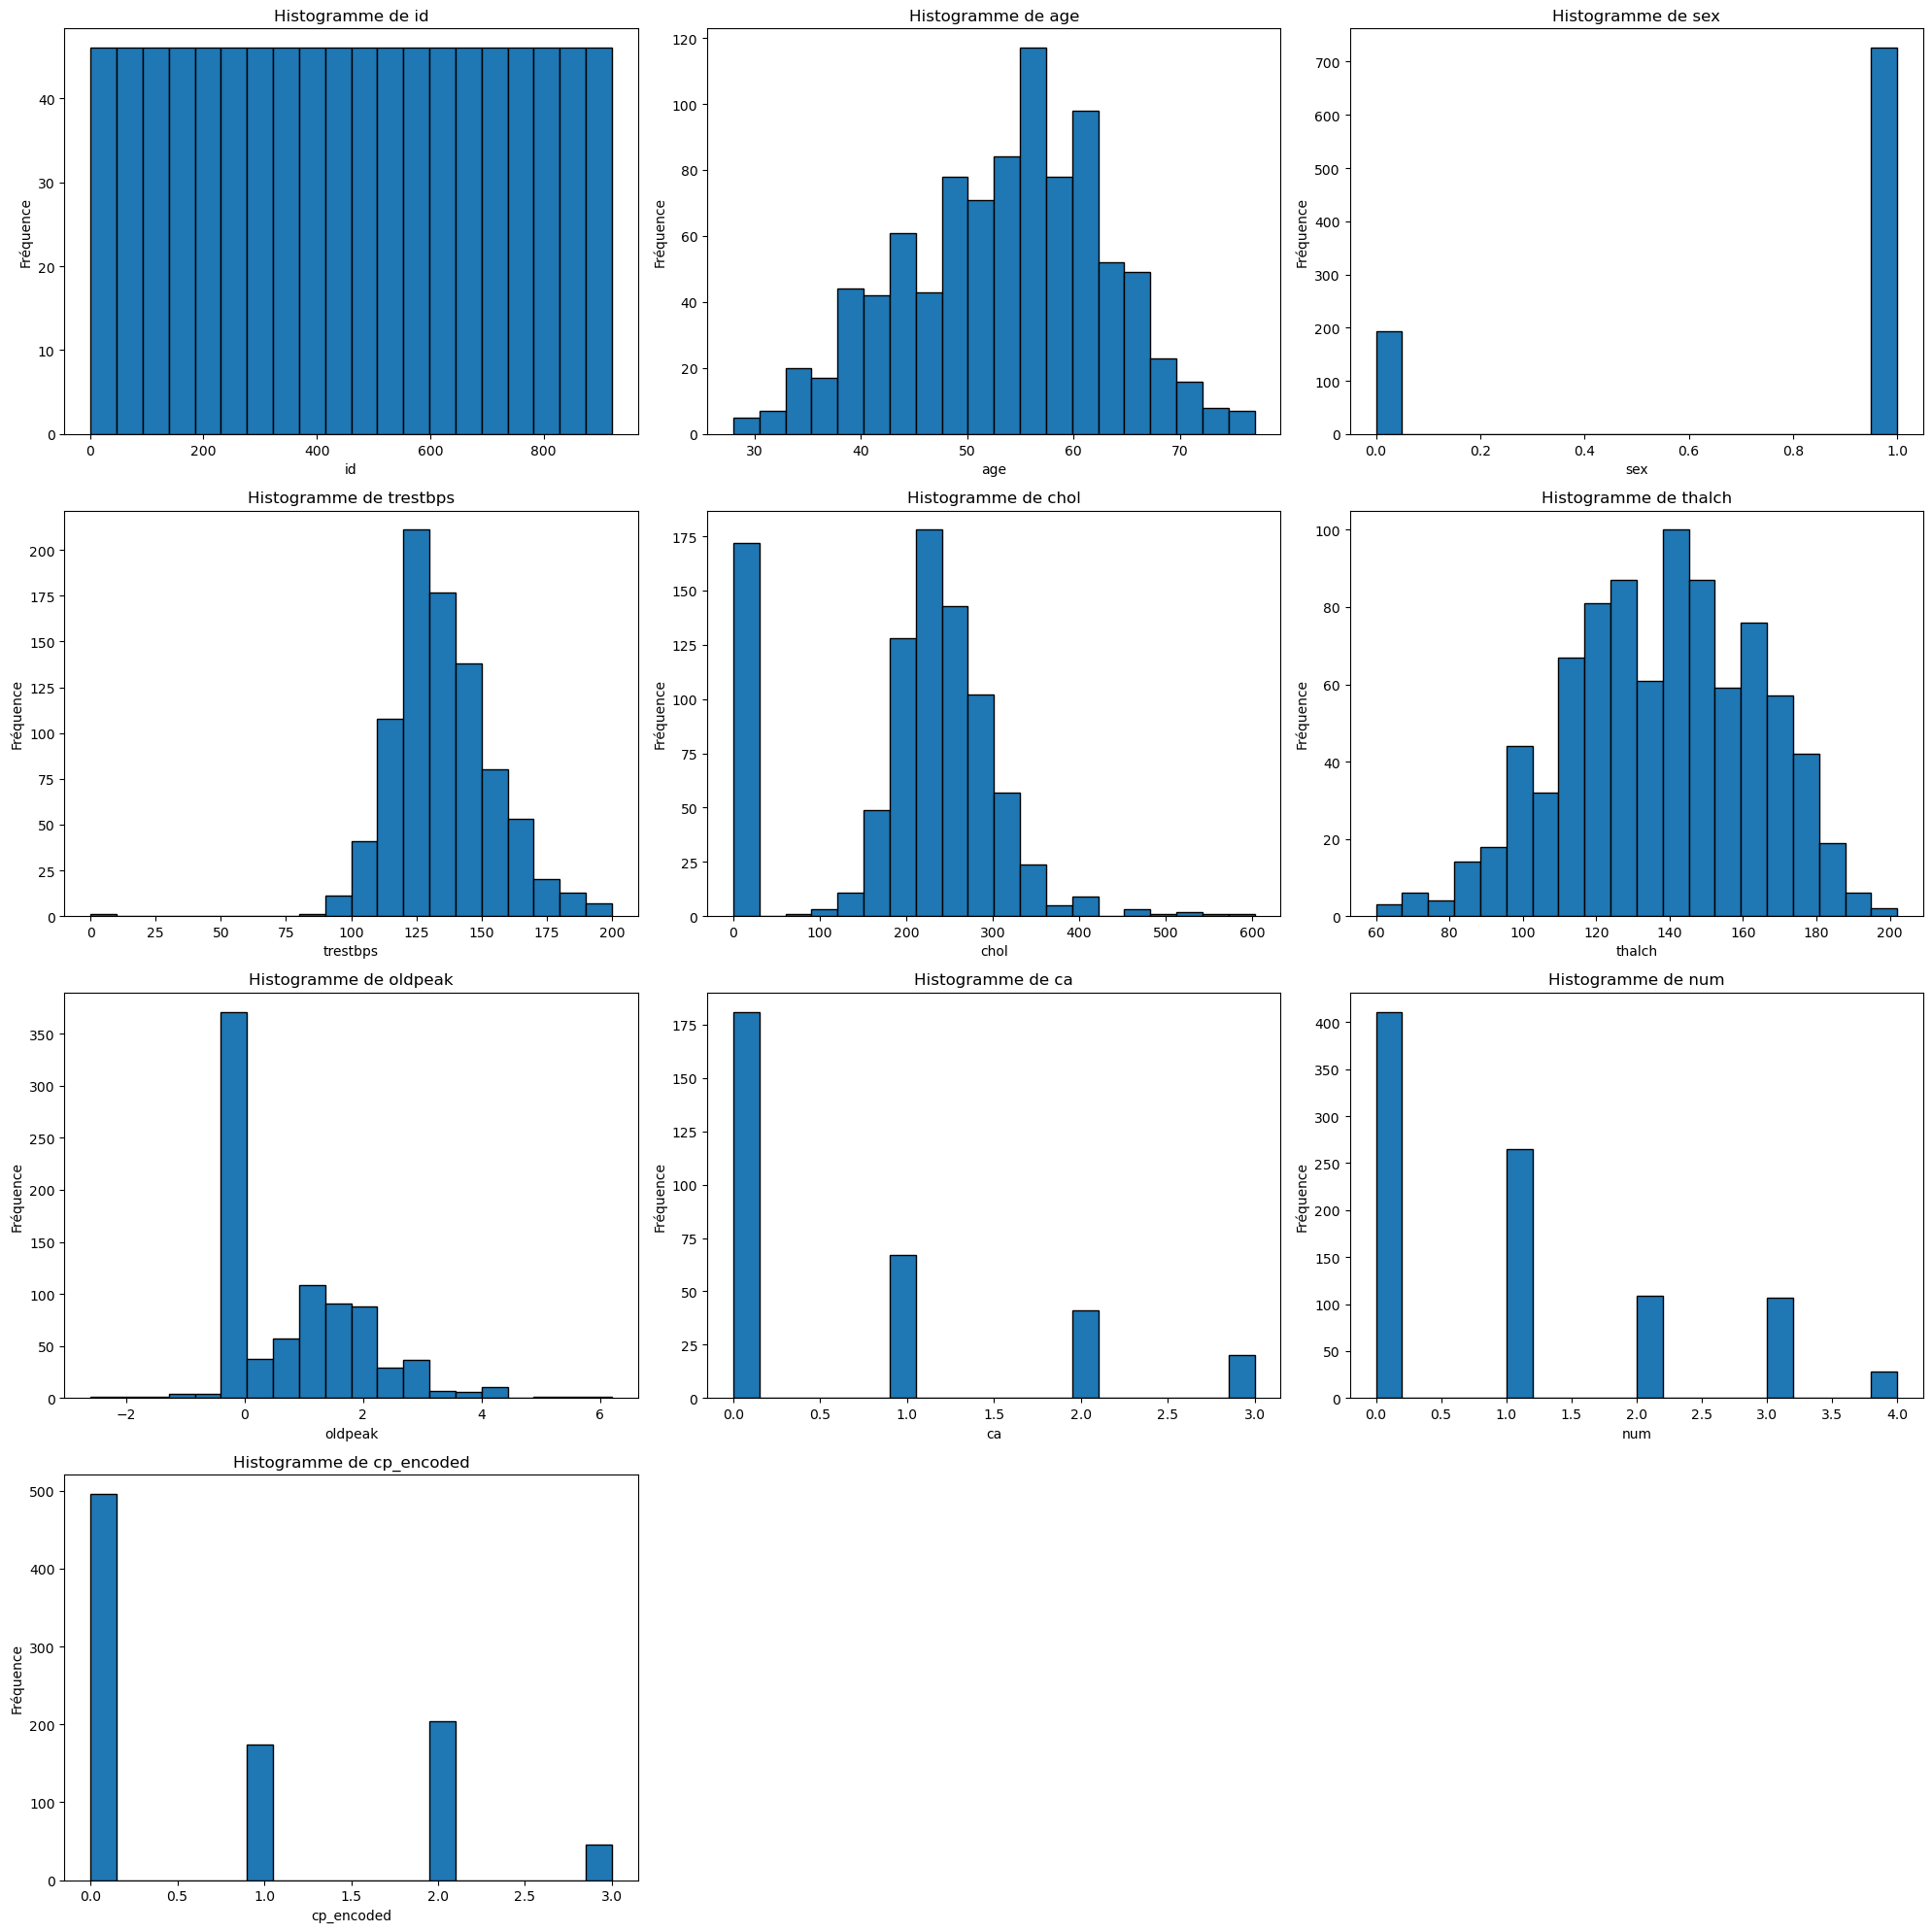

In [3]:
# Bloc 3 : Visualisation des histogrammes des caractéristiques

# Sélectionner les colonnes numériques pour l'histogramme
numeric_columns = df.select_dtypes(include=['number']).columns

# Nombre de colonnes numériques
n_cols = len(numeric_columns)

# Déterminer le nombre de lignes et de colonnes pour les sous-graphiques
n_rows = (n_cols // 3) + (n_cols % 3 > 0)  # Arrondir vers le haut pour le nombre de lignes

# Création de la figure et des axes
fig, axes = plt.subplots(nrows=n_rows, ncols=3, figsize=(20, 5 * n_rows))
axes = axes.flatten()  # Aplati le tableau de axes pour faciliter l'itération

# Histogrammes des caractéristiques
for i, col in enumerate(numeric_columns):
    axes[i].hist(df[col], bins=20, edgecolor='black')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Fréquence')
    axes[i].set_title(f'Histogramme de {col}')

# Supprimer les axes non utilisés
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


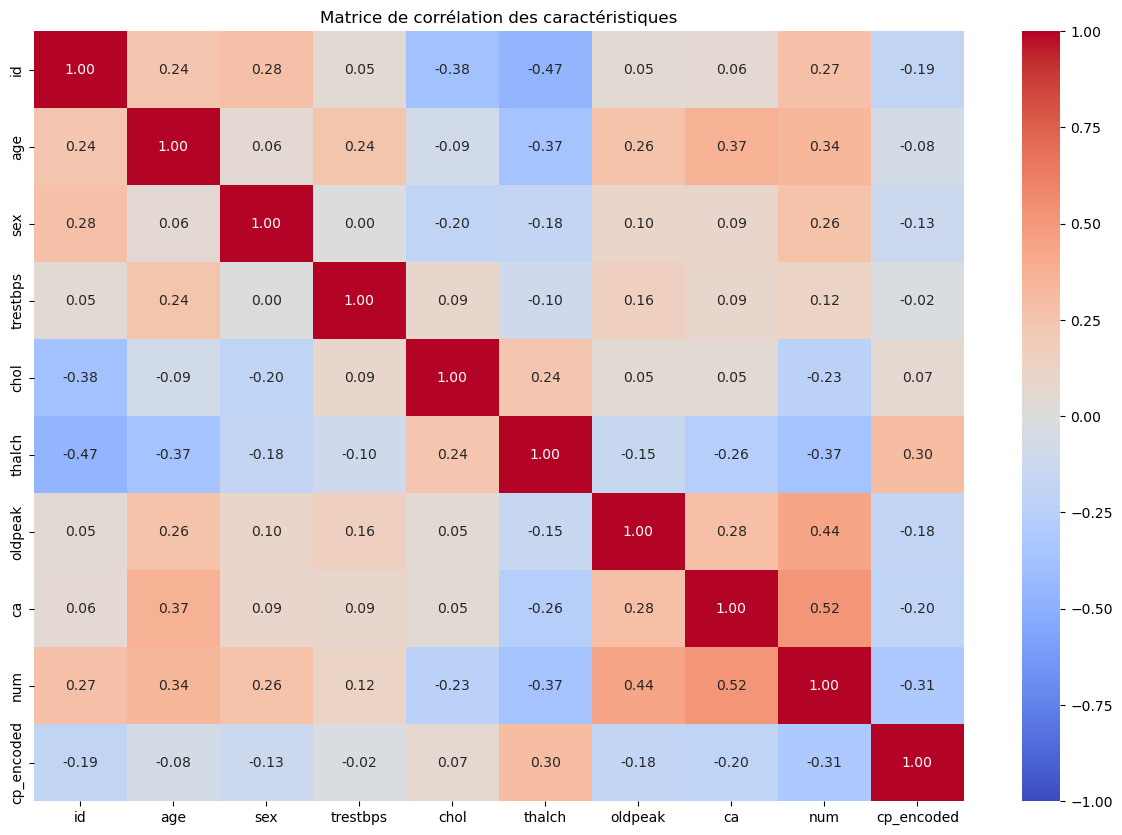

In [4]:
# Bloc 4 : Visualisation de la matrice de corrélation
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de corrélation des caractéristiques')
plt.show()


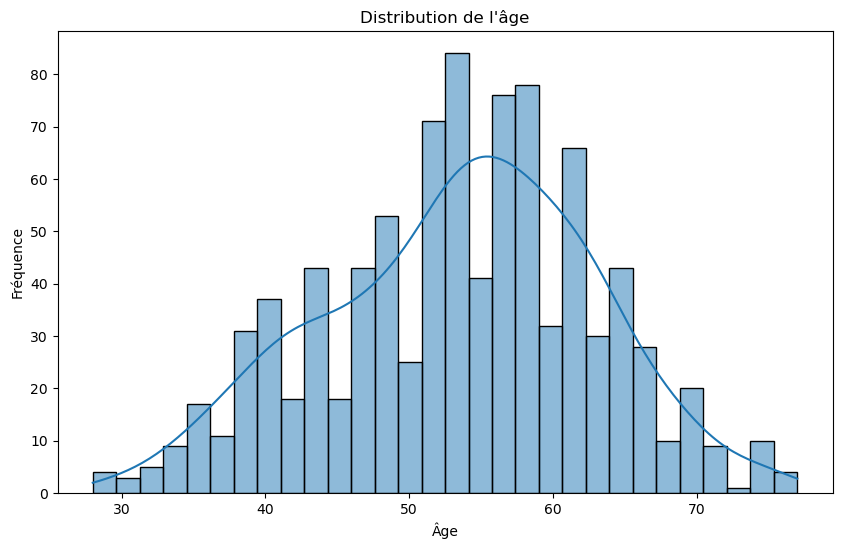

In [5]:
# Bloc 5 : Distribution de l'âge
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Distribution de l\'âge')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()


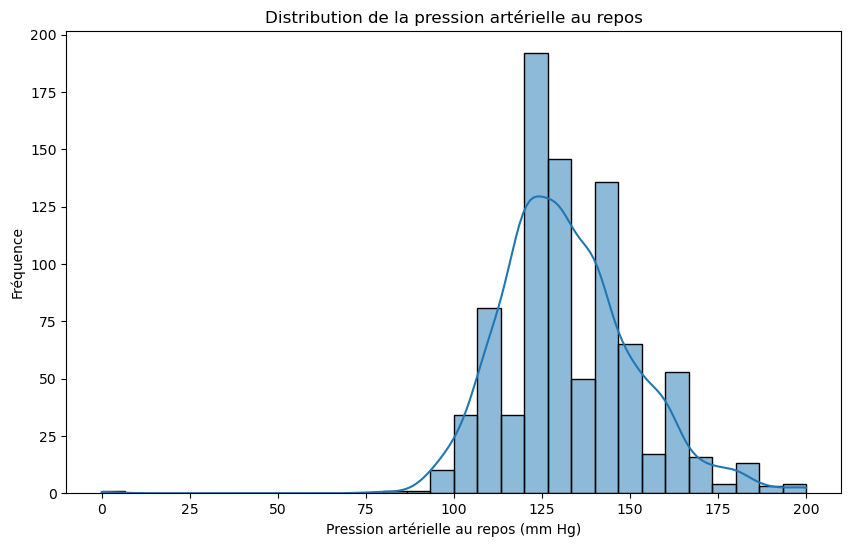

In [6]:
# Bloc 6 : Distribution de la pression artérielle au repos
plt.figure(figsize=(10, 6))
sns.histplot(df['trestbps'], kde=True, bins=30)
plt.title('Distribution de la pression artérielle au repos')
plt.xlabel('Pression artérielle au repos (mm Hg)')
plt.ylabel('Fréquence')
plt.show()


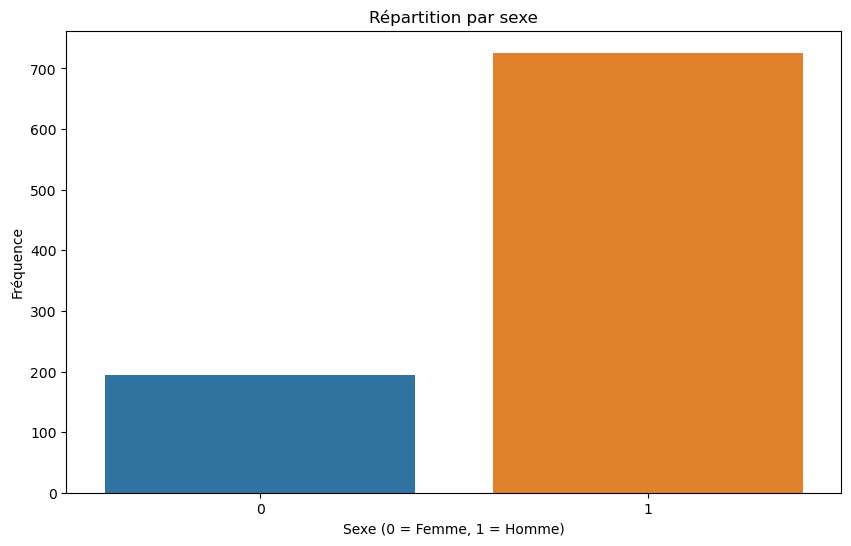

In [7]:
# Bloc 7 : Répartition par sexe
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=df)
plt.title('Répartition par sexe')
plt.xlabel('Sexe (0 = Femme, 1 = Homme)')
plt.ylabel('Fréquence')
plt.show()


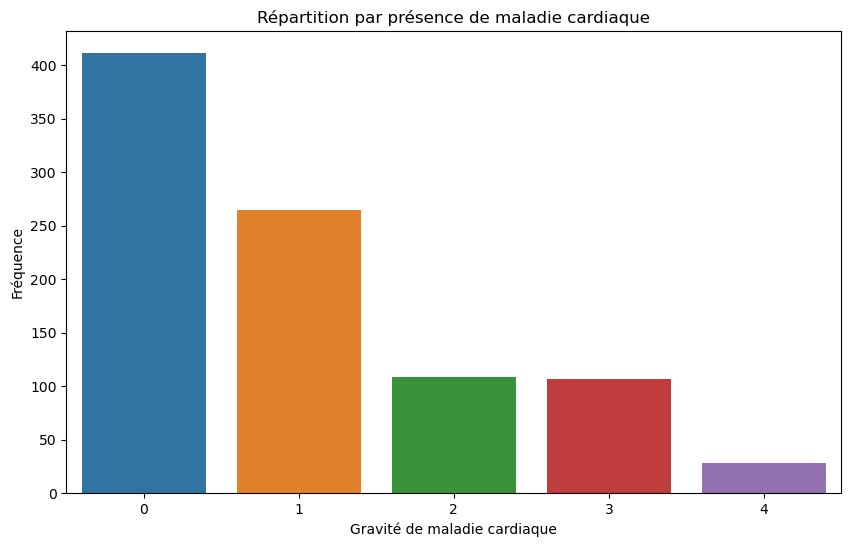

In [8]:
# Bloc 8 : Répartition par présence de maladie cardiaque

# Créer un dictionnaire pour les labels
num_labels = {0: 'Absence de maladie', 1: 'Maladie légère', 2: 'Maladie modérée', 3: 'Maladie sévère', 4: 'Maladie très sévère'}

# Remplacer les valeurs numériques par des étiquettes descriptives
df['num_label'] = df['num'].map(num_labels)

# Répartition par présence de maladie cardiaque avec les étiquettes
plt.figure(figsize=(10, 6))
sns.countplot(x='num', data=df)
plt.title('Répartition par présence de maladie cardiaque')
plt.xlabel('Gravité de maladie cardiaque')
plt.ylabel('Fréquence')
plt.show()


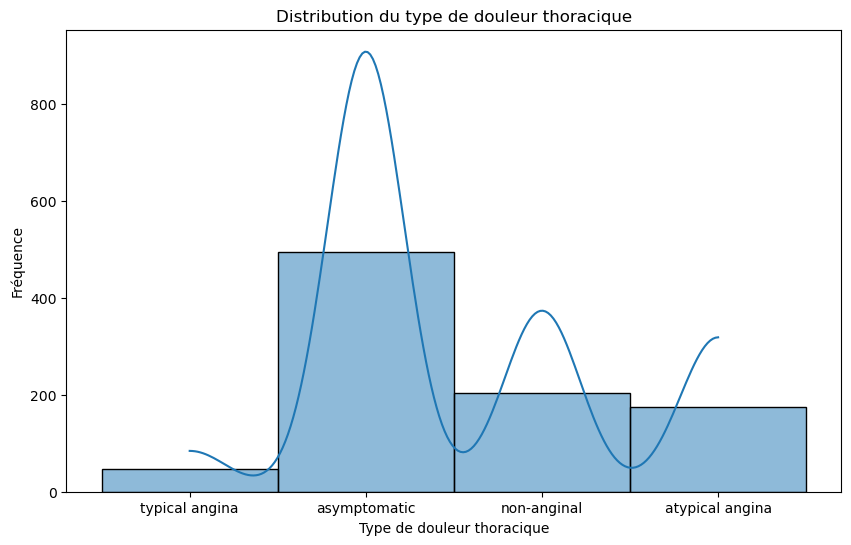

In [9]:
# Bloc 9 : Distribution de Type de douleur thoracique
plt.figure(figsize=(10, 6))
sns.histplot(df['cp'], kde=True, bins=30)
plt.title('Distribution du type de douleur thoracique')
plt.xlabel('Type de douleur thoracique')
plt.ylabel('Fréquence')
plt.show()


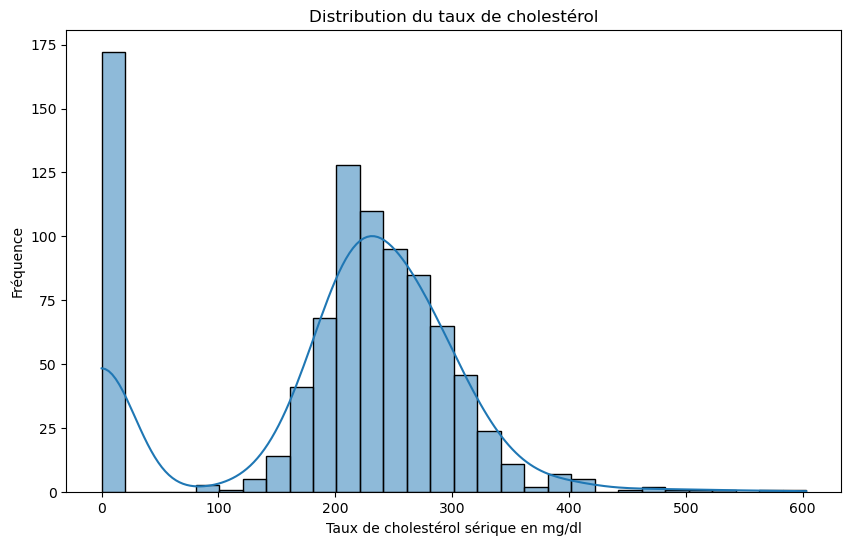

In [10]:
# Bloc 10 : Distribution de Taux de cholestérol
plt.figure(figsize=(10, 6))
sns.histplot(df['chol'], kde=True, bins=30)
plt.title('Distribution du taux de cholestérol')
plt.xlabel('Taux de cholestérol sérique en mg/dl')
plt.ylabel('Fréquence')
plt.show()


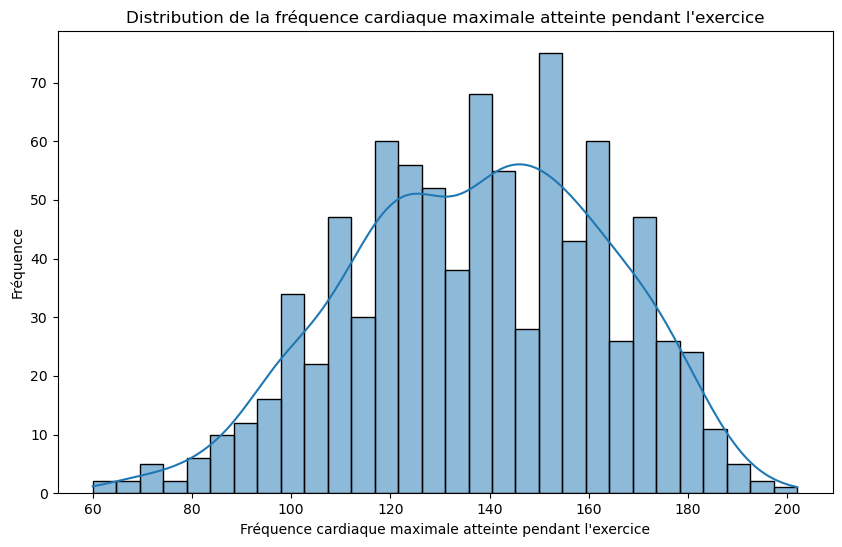

In [11]:
# Bloc 11 : Distribution de Fréquence cardiaque maximale atteinte pendant l'exercice
plt.figure(figsize=(10, 6))
sns.histplot(df['thalch'], kde=True, bins=30)
plt.title('Distribution de la fréquence cardiaque maximale atteinte pendant l\'exercice')
plt.xlabel('Fréquence cardiaque maximale atteinte pendant l\'exercice')
plt.ylabel('Fréquence')
plt.show()


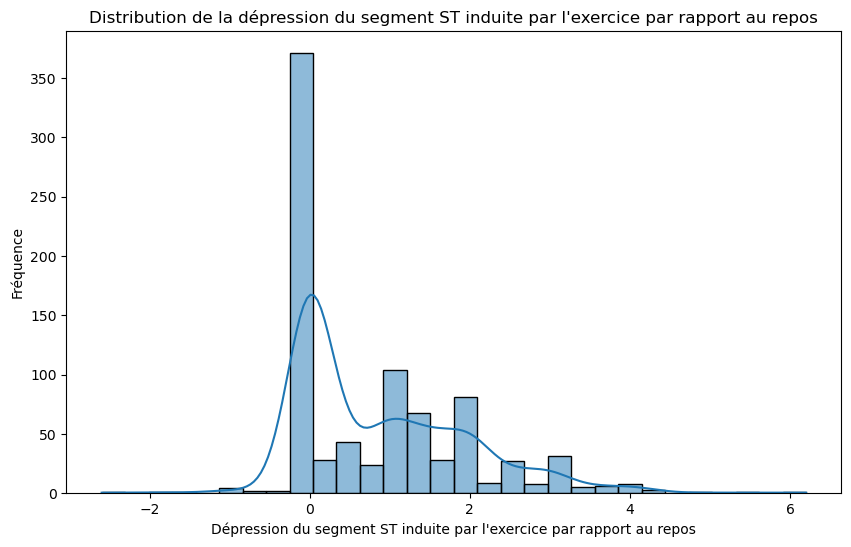

In [12]:
# Bloc 12 : Distribution de Dépression du segment ST induite par l'exercice par rapport au repos
plt.figure(figsize=(10, 6))
sns.histplot(df['oldpeak'], kde=True, bins=30)
plt.title('Distribution de la dépression du segment ST induite par l\'exercice par rapport au repos')
plt.xlabel('Dépression du segment ST induite par l\'exercice par rapport au repos')
plt.ylabel('Fréquence')
plt.show()

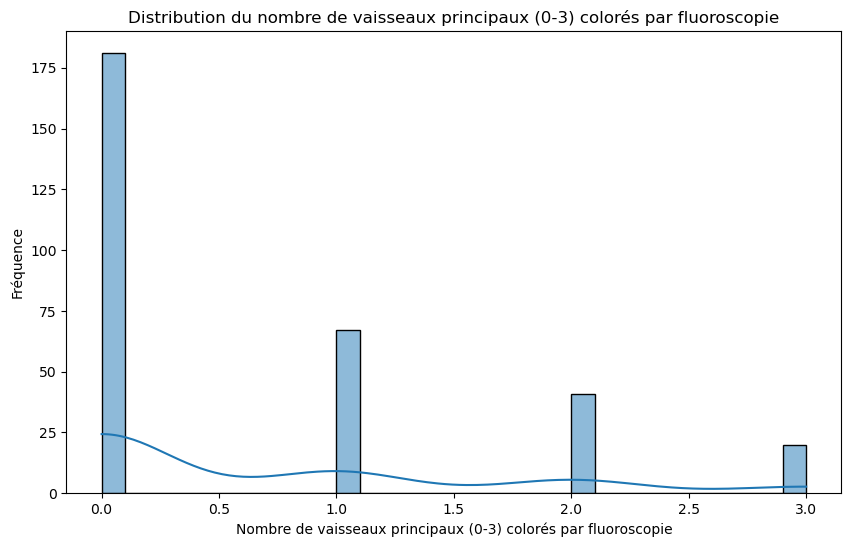

In [13]:
# Bloc 13 : Distribution de Nombre de vaisseaux principaux (0-3) colorés par fluoroscopie
plt.figure(figsize=(10, 6))
sns.histplot(df['ca'], kde=True, bins=30)
plt.title('Distribution du nombre de vaisseaux principaux (0-3) colorés par fluoroscopie')
plt.xlabel('Nombre de vaisseaux principaux (0-3) colorés par fluoroscopie')
plt.ylabel('Fréquence')
plt.show()